In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pendulum
import imp

In [98]:
imp.reload(pendulum)

<module 'pendulum' from 'Z:\\My Documents\\myTexts\\2021PendulumDamping\\code\\pendulum.py'>

### A stationary damped pendulum 
For fun.

In [95]:
T0 = 120
pend = pendulum.torsionpendulum(theta0=1,theta_dot0=0,w0=2*np.pi/T0,xi=0.1)

In [22]:
pend.go(360)

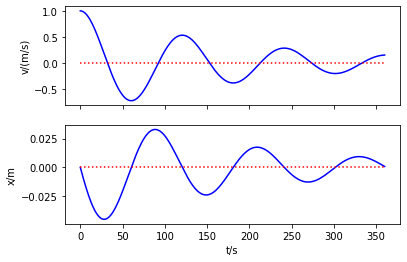

In [23]:
fig, ax = plt.subplots(2,sharex=True)
ax[0].plot(pend.out_t,pend.out_theta,'b-')
ax[0].plot(pend.out_t,pend.out_n,'r:')
ax[1].plot(pend.out_t,pend.out_theta_dot,'b-')
ax[1].plot(pend.out_t,pend.out_n_dot,'r:')
ax[1].set_xlabel('t/s')
ax[0].set_ylabel('v/(m/s)')
ax[1].set_ylabel('x/m')
pass

### demonstration of a cosine like torque

Here we just show the cosine like torque. We show one in the positive the other in the negative direction. In the real experiment te torque is small, 3.11e-8 Nm. The motor takes 19.2 to move the source masses half way

In [27]:
deltat = 19.2
t1 = 30
tau = 40
times =  [t1,t1+deltat,t1+tau,t1+tau+deltat]
amp = 3.11e-8
postor = pendulum.cos_tor(times,amp) 
negtor = pendulum.cos_tor(times,-amp)

In [36]:
t = np.linspace(0,120,240)
ptor = []
ntor = []
for tt in t:
    ptor.append(postor.n(tt)*1e9) # multiply  by 1e9 to get nNm
    ntor.append(negtor.n(tt)*1e9)

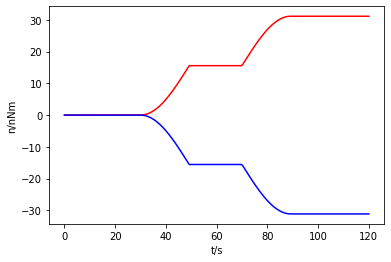

In [38]:
fig,ax = plt.subplots(1)
ax.plot(t,ptor,'r-')
ax.plot(t,ntor,'b-')
ax.set_xlabel('t/s')
ax.set_ylabel('n/nNm')
pass

### Damp a moving torsion pendulum to 0. 
with the cosine move

In [74]:
v0 =1.0/3600.0/180.0*np.pi # 1 arcses/s in rad/s
na = 3.11e-8
deltat = 19.2
T0=120.0
I=0.076233
fm = pendulum.find_move(deltat=deltat,w0=2*np.pi/T0,na=na,I=I)
t1,t3,vfinal =fm.find_t1_t3(desired_vamp=0,v0=v0)
t1 = t1+T0  #Let's add one period to observe the p.
t3 = t3+T0
times =  [t1,t1+deltat,t3,t3+deltat]
amp = 3.11e-8
postor = pendulum.cos_tor(times,amp) 

In [75]:
pend = pendulum.torsionpendulum(theta0=0,theta_dot0=v0,w0=2*np.pi/T0,\
                                xi=0.0,ext_torque=postor.n)

In [83]:
pend.go(360)
pend.out_theta = np.array(pend.out_theta)  # convert to array so we can multiply with scale
pend.out_theta_dot = np.array(pend.out_theta_dot)
pend.out_n = np.array(pend.out_n)  # convert to array so we can multiply with scale
pend.out_n_dot = np.array(pend.out_n_dot)

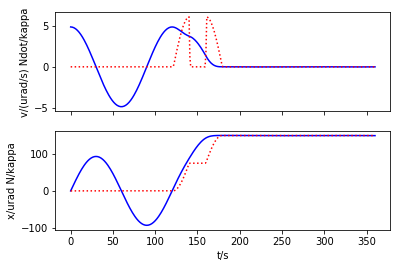

In [85]:
w0 = 2*np.pi/T0
kappa = w0*w0*I
fig, ax = plt.subplots(2,sharex=True)
ax[0].plot(pend.out_t,pend.out_theta_dot*1e6,'b-')
ax[0].plot(pend.out_t,pend.out_n_dot/kappa*1e6,'r:')
ax[1].plot(pend.out_t,pend.out_theta*1e6,'b-')
ax[1].plot(pend.out_t,pend.out_n/kappa*1e6,'r:')
ax[1].set_xlabel('t/s')
ax[0].set_ylabel('v/(urad/s) Ndot/kappa')
ax[1].set_ylabel('x/urad N/kappa')
pass

### Damp a moving torsion pendulum to arbitraty amplitude. 
with the cosine move


The function find_move can be used to damp the pendulum to any amplitude in the parameter space. Note find_move takes a desired velocity. If one desires as swing ampplitude that can be converted:


v_des = theta_des * w0


In [105]:
v0 =1.0/3600.0/180.0*np.pi # 1 arcses/s in rad/s
na = 3.11e-8
deltat = 19.2
T0=120.0
I=0.076233
theta_des = 30e-6
v_des = theta_des*w0
print("Desired theta amplitude : {0:4.3f} urad".format(1e6*theta_des))
print("Desired theta_dot amplitude : {0:4.3f} urad/s".format(1e6*v_des))
fm = pendulum.find_move(deltat=deltat,w0=2*np.pi/T0,na=na,I=I)
t1,t3,vfinal =fm.find_t1_t3(desired_vamp=v_des,v0=v0)
print("Obtaines theta_dot amplitude : {0:4.3f} urad/s".format(1e6*vfinal))
t1 = t1+T0  #Let's add one period to observe the p.
t3 = t3+T0
times =  [t1,t1+deltat,t3,t3+deltat]
amp = 3.11e-8
postor = pendulum.cos_tor(times,amp) 

Desired theta amplitude : 30.000 urad
Desired theta_dot amplitude : 1.571 urad/s
Obtaines theta_dot amplitude : 1.572 urad/s


In [106]:
pend = pendulum.torsionpendulum(theta0=0,theta_dot0=v0,w0=2*np.pi/T0,\
                                xi=0.0,ext_torque=postor.n)

In [107]:
pend.go(360)
pend.out_theta = np.array(pend.out_theta)  # convert to array so we can multiply with scale
pend.out_theta_dot = np.array(pend.out_theta_dot)
pend.out_n = np.array(pend.out_n)  # convert to array so we can multiply with scale
pend.out_n_dot = np.array(pend.out_n_dot)

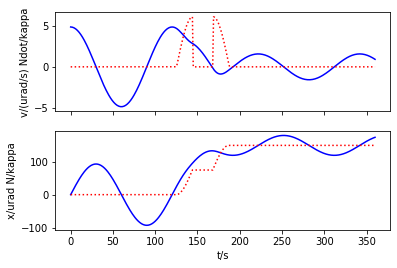

In [108]:
w0 = 2*np.pi/T0
kappa = w0*w0*I
fig, ax = plt.subplots(2,sharex=True)
ax[0].plot(pend.out_t,pend.out_theta_dot*1e6,'b-')
ax[0].plot(pend.out_t,pend.out_n_dot/kappa*1e6,'r:')
ax[1].plot(pend.out_t,pend.out_theta*1e6,'b-')
ax[1].plot(pend.out_t,pend.out_n/kappa*1e6,'r:')
ax[1].set_xlabel('t/s')
ax[0].set_ylabel('v/(urad/s) Ndot/kappa')
ax[1].set_ylabel('x/urad N/kappa')
pass

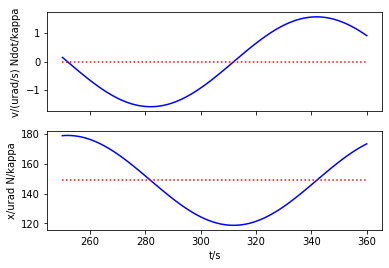

In [109]:
beg = 250
w0 = 2*np.pi/T0
kappa = w0*w0*I
fig, ax = plt.subplots(2,sharex=True)
ax[0].plot(pend.out_t[beg:],pend.out_theta_dot[beg:]*1e6,'b-')
ax[0].plot(pend.out_t[beg:],pend.out_n_dot[beg:]/kappa*1e6,'r:')
ax[1].plot(pend.out_t[beg:],pend.out_theta[beg:]*1e6,'b-')
ax[1].plot(pend.out_t[beg:],pend.out_n[beg:]/kappa*1e6,'r:')
ax[1].set_xlabel('t/s')
ax[0].set_ylabel('v/(urad/s) Ndot/kappa')
ax[1].set_ylabel('x/urad N/kappa')
pass